# Task 4: Insights and Recommendations
## Business Intelligence Analysis for Bank Apps

This notebook generates actionable insights, creates visualizations, and provides recommendations for improving bank mobile applications based on user review analysis.

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sys
import os

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

# Add project root to path
sys.path.append(' ')

# Import our analysis modules
from src.insights.analyzer import InsightsAnalyzer
from src.insights.visualizer import DataVisualizer

print("Task 4 analysis environment ready.")

Task 4 analysis environment ready.


## 1. Data Preparation

Load the processed review data and initialize our analysis tools.

In [16]:
import os

# Get absolute path to project root
project_root = os.path.abspath('..')
data_path = os.path.join(project_root, 'data', 'processed', 'sentiment_themes_analysis.csv')

print(f"Looking for data at: {data_path}")
print(f"File exists: {os.path.exists(data_path)}")

# Initialize with specific path
analyzer = InsightsAnalyzer(data_path=data_path)
visualizer = DataVisualizer(data_path=data_path)

# Load data
if analyzer.load_data():
    print(f"Data loaded successfully: {len(analyzer.df)} reviews")
else:
    # Try alternative path
    print("Trying alternative path...")
    alt_path = "sentiment_themes_analysis.csv"
    analyzer = InsightsAnalyzer(data_path=alt_path)
    visualizer = DataVisualizer(data_path=alt_path)
    
    if analyzer.load_data():
        print(f"Data loaded successfully: {len(analyzer.df)} reviews")
    else:
        print("Failed to load data from any location")

Looking for data at: /home/nabi/Kaim-week2-fintech-reviews/data/processed/sentiment_themes_analysis.csv
File exists: True
Loaded 1346 reviews for insights analysis
Data loaded successfully: 1346 reviews


## 2. Insights Generation

Generate comprehensive business insights including sentiment analysis, theme analysis, pain points, and satisfaction drivers.

In [19]:
print("Generating insights report...")
report = analyzer.generate_insights_report()

if report:
    # Display summary statistics
    print("\nSUMMARY STATISTICS")
    print("=" * 40)
    summary = report['summary_statistics']
    print(f"Total Reviews: {summary['total_reviews']}")
    print(f"Banks Analyzed: {summary['banks_analyzed']}")
    print(f"Overall Positive Reviews: {summary['overall_positive_pct']:.1f}%")
    print(f"Overall Average Rating: {summary['overall_avg_rating']:.2f} stars")
    
    # Ensure directory exists
    import os
    os.makedirs('data/processed', exist_ok=True)
    
    # Save report to JSON
    success = analyzer.save_report(report)
    if success:
        print(f"\nInsights report saved to data/processed/insights_report.json")
    else:
        print(f"\nFailed to save insights report")
else:
    print("Failed to generate insights report")

Generating insights report...

SUMMARY STATISTICS
Total Reviews: 1346
Banks Analyzed: 3
Overall Positive Reviews: 32.6%
Overall Average Rating: 2.91 stars
Insights report saved to data/processed/insights_report.json

Insights report saved to data/processed/insights_report.json


## 3. Bank Performance Comparison

Compare the performance of the three banks across key metrics: ratings, sentiment, and user satisfaction.

In [20]:
# Compare bank performance
print("BANK PERFORMANCE COMPARISON")
print("=" * 40)

sentiment_analysis = report['sentiment_analysis']

# Create comparison table
comparison_data = []
for bank, metrics in sentiment_analysis.items():
    comparison_data.append({
        'Bank': bank,
        'Avg Rating': f"{metrics['avg_rating']:.2f}",
        'Positive %': f"{metrics['positive_pct']:.1f}%",
        'Avg Sentiment': f"{metrics['avg_sentiment_score']:.3f}",
        'Total Reviews': metrics['total_reviews']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

BANK PERFORMANCE COMPARISON
                       Bank Avg Rating Positive % Avg Sentiment  Total Reviews
Commercial Bank of Ethiopia       2.67      16.2%         0.971            450
          Bank of Abyssinia       2.07      16.0%         0.989            450
                Dashen Bank       3.98      65.9%         0.987            446


## 4. Pain Points Identification

Identify and analyze the key pain points for each bank based on negative reviews and thematic analysis.

In [21]:
# Analyze pain points
print("\nPAIN POINTS ANALYSIS")
print("=" * 40)

pain_points = report['pain_points']

for bank, analysis in pain_points.items():
    print(f"\n{bank}:")
    print(f"  Negative Reviews: {analysis['negative_review_count']} ({analysis['negative_percentage']:.1f}%)")
    
    if analysis['top_pain_points']:
        print("  Top Pain Points:")
        for theme, count in analysis['top_pain_points'].items():
            print(f"    • {theme}: {count} mentions")
    else:
        print("  No significant pain points identified")


PAIN POINTS ANALYSIS

Commercial Bank of Ethiopia:
  Negative Reviews: 377 (83.8%)
  Top Pain Points:
    • TRANSACTIONS: 222 mentions
    • FEATURE_REQUEST: 164 mentions
    • RELIABILITY_ISSUES: 160 mentions

Bank of Abyssinia:
  Negative Reviews: 378 (84.0%)
  Top Pain Points:
    • RELIABILITY_ISSUES: 120 mentions
    • APP_PERFORMANCE: 109 mentions
    • TRANSACTIONS: 89 mentions

Dashen Bank:
  Negative Reviews: 152 (34.1%)
  Top Pain Points:
    • RELIABILITY_ISSUES: 37 mentions
    • APP_PERFORMANCE: 36 mentions
    • TRANSACTIONS: 34 mentions


## 5. Satisfaction Drivers Identification

Identify what users appreciate about each bank's app based on positive reviews and thematic analysis.

In [22]:
# Analyze satisfaction drivers
print("\nSATISFACTION DRIVERS ANALYSIS")
print("=" * 40)

drivers = report['drivers']

for bank, analysis in drivers.items():
    print(f"\n{bank}:")
    print(f"  Positive Reviews: {analysis['positive_review_count']} ({analysis['positive_percentage']:.1f}%)")
    
    if analysis['top_drivers']:
        print("  Top Satisfaction Drivers:")
        for theme, count in analysis['top_drivers'].items():
            print(f"    • {theme}: {count} mentions")
    else:
        print("  No significant drivers identified")


SATISFACTION DRIVERS ANALYSIS

Commercial Bank of Ethiopia:
  Positive Reviews: 73 (16.2%)
  Top Satisfaction Drivers:
    • TRANSACTIONS: 38 mentions
    • FEATURE_REQUEST: 30 mentions
    • RELIABILITY_ISSUES: 18 mentions

Bank of Abyssinia:
  Positive Reviews: 72 (16.0%)
  Top Satisfaction Drivers:
    • APP_PERFORMANCE: 16 mentions
    • TRANSACTIONS: 9 mentions
    • CUSTOMER_SUPPORT: 7 mentions

Dashen Bank:
  Positive Reviews: 294 (65.9%)
  Top Satisfaction Drivers:
    • APP_PERFORMANCE: 80 mentions
    • TRANSACTIONS: 62 mentions
    • USER_INTERFACE: 33 mentions


## 6. Data Visualization

Create professional visualizations for stakeholder presentations and reports.

Creating visualizations...
Loading data into visualizer...
Loaded 1346 reviews for visualization
Visualizer data loaded: 1346 reviews
Saved sentiment comparison plot to reports/figures/sentiment_comparison.png


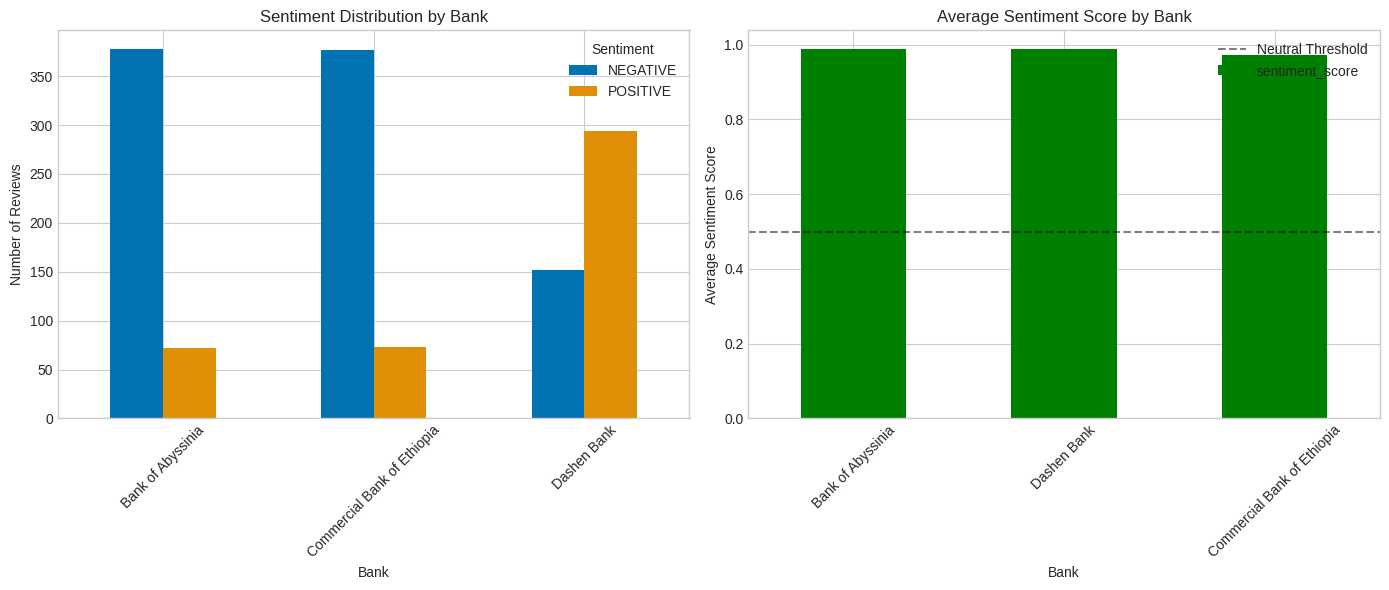

Saved rating distribution plot to reports/figures/rating_distribution.png


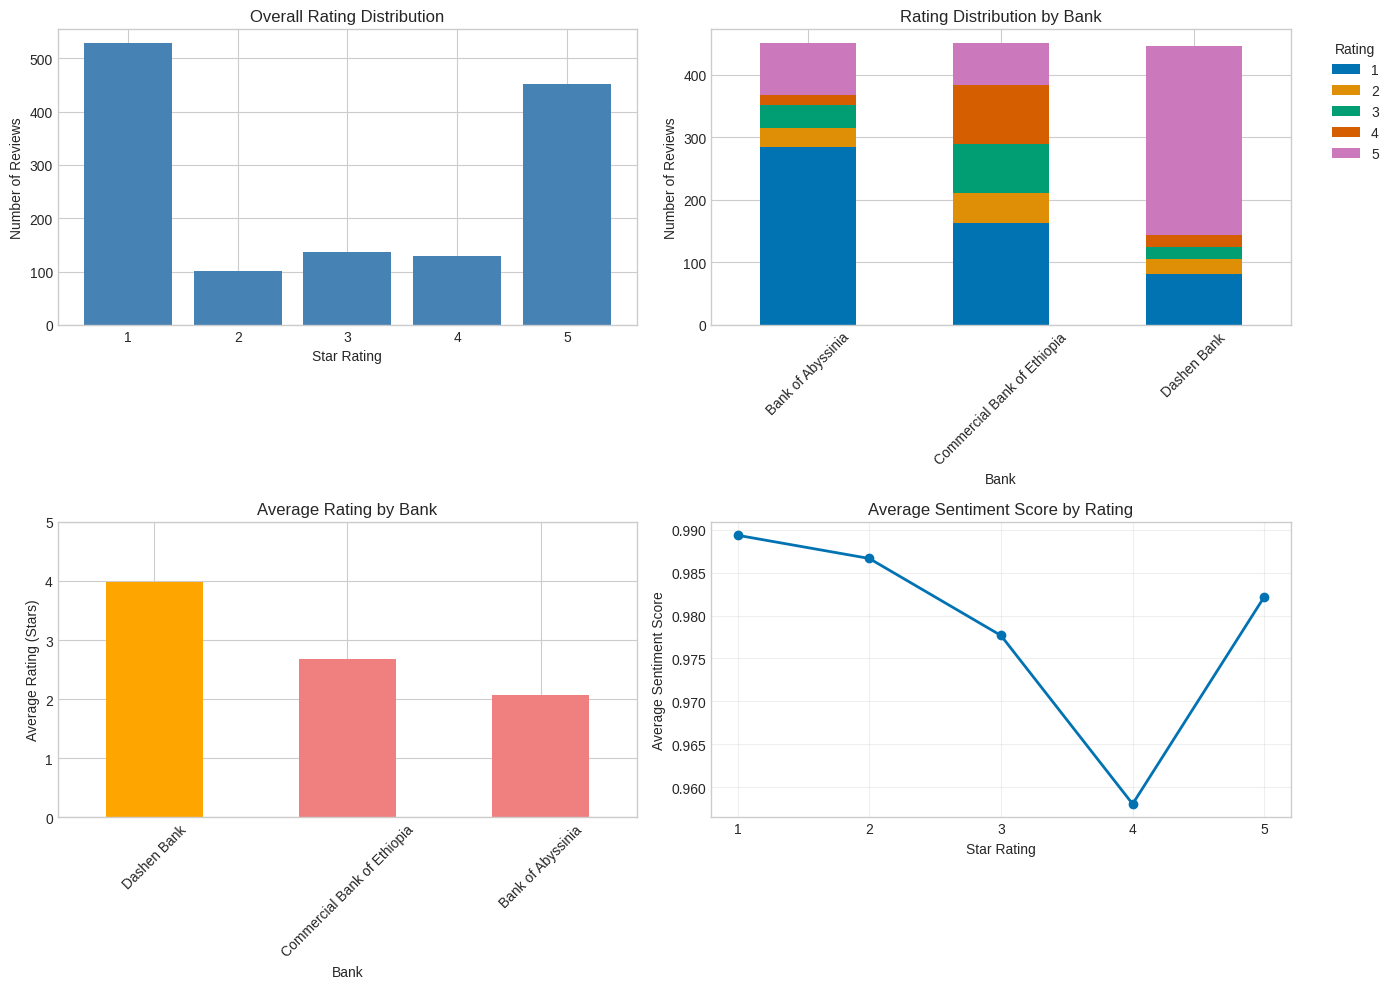

Saved theme analysis plot to reports/figures/theme_analysis.png


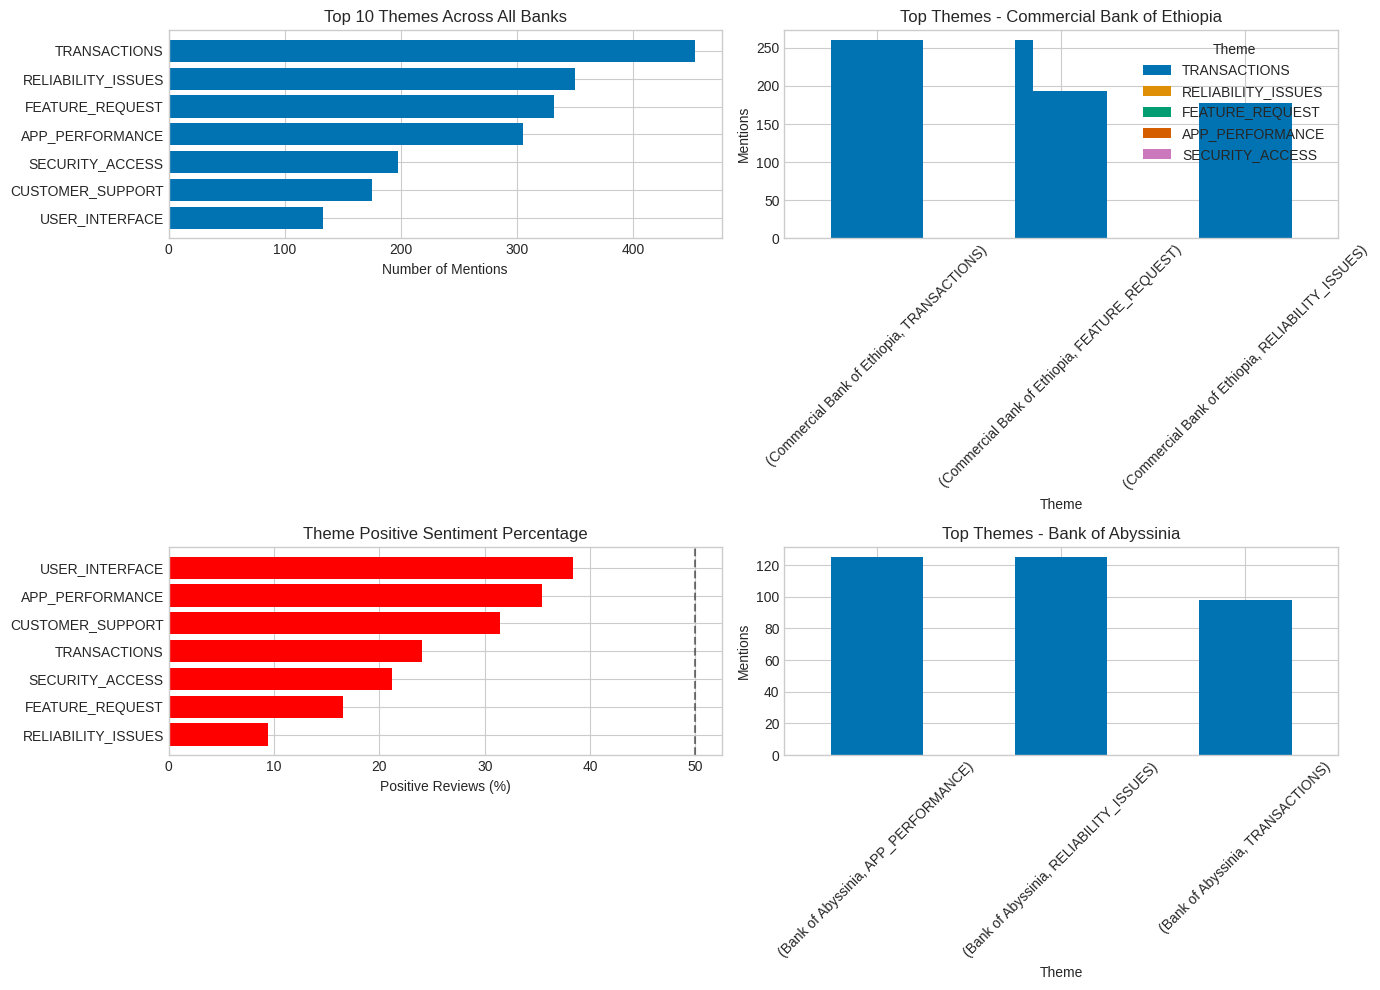


Generating word clouds...
Saved word cloud to reports/figures/wordcloud_all_banks.png


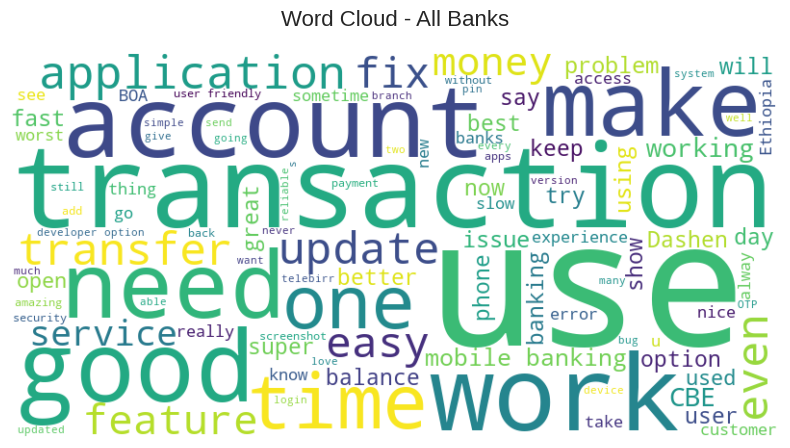

Saved word cloud to reports/figures/wordcloud_commercial_bank_of_ethiopia.png


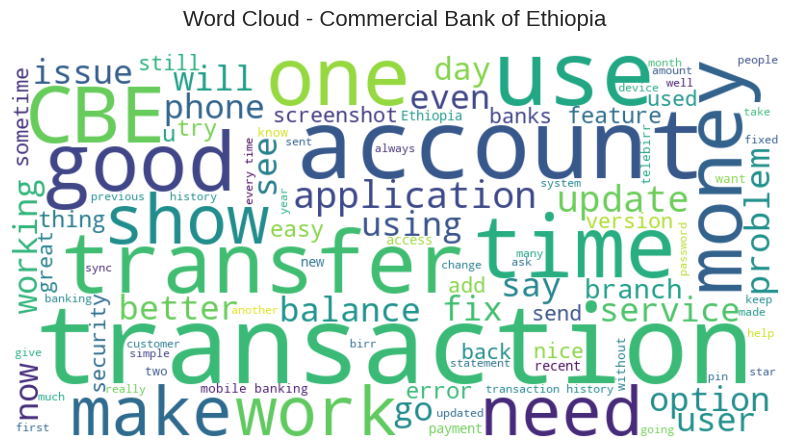

Saved word cloud to reports/figures/wordcloud_bank_of_abyssinia.png


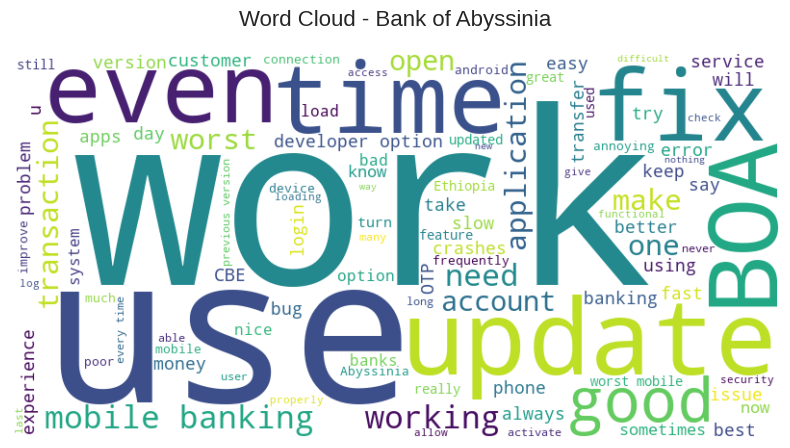

Saved word cloud to reports/figures/wordcloud_dashen_bank.png


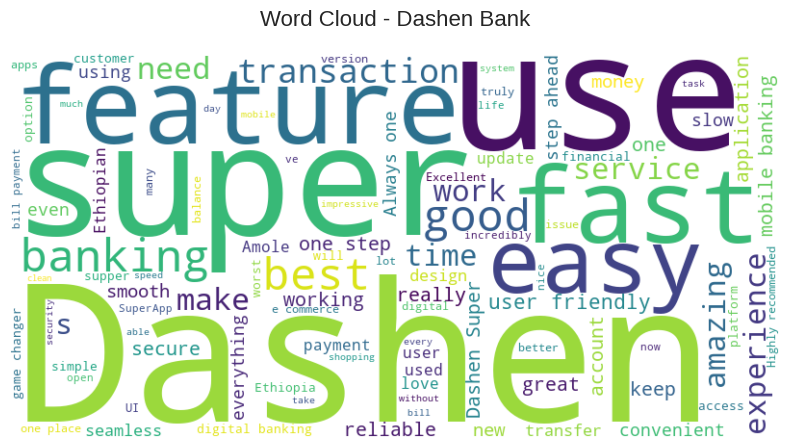


All visualizations created and saved to reports/figures/


In [ ]:
print("Creating visualizations...")

# Make sure visualizer has data
if visualizer.df is None:
    print("Loading data into visualizer...")
    if not visualizer.load_data():
        print("Failed to load data for visualization")
    else:
        print(f"Visualizer data loaded: {len(visualizer.df)} reviews")

if visualizer.df is not None:
    # Create sentiment comparison plot
    fig1 = visualizer.plot_sentiment_comparison(save=True)
    if fig1:
        plt.show()
    else:
        print("Failed to create sentiment comparison plot")
    
    # Create rating distribution plot
    fig2 = visualizer.plot_rating_distribution(save=True)
    if fig2:
        plt.show()
    else:
        print("Failed to create rating distribution plot")
    
    # Create theme analysis plot
    fig3 = visualizer.plot_theme_analysis(save=True)
    if fig3:
        plt.show()
    else:
        print("Failed to create theme analysis plot")
    
    # Create word clouds
    print("\nGenerating word clouds...")
    visualizer.create_word_cloud()
    plt.show()
    
    for bank in analyzer.df['bank'].unique():
        visualizer.create_word_cloud(bank=bank)
        plt.show()
    
    print("\nAll visualizations created and saved to reports/figures/")
else:
    print("Cannot create visualizations: No data available")

## 7. Actionable Recommendations

Generate specific, actionable recommendations for each bank based on the analysis results.

In [25]:
# Generate recommendations
print("ACTIONABLE RECOMMENDATIONS")
print("=" * 40)

recommendations = report['recommendations']

for bank, recs in recommendations.items():
    print(f"\n{bank.upper()}")
    print("-" * 30)
    
    if recs:
        for i, rec in enumerate(recs[:3], 1):  # Show top 3 recommendations
            print(f"\n{i}. [{rec['priority']} PRIORITY] - {rec['area']}")
            print(f"   Recommendation: {rec['recommendation']}")
            print(f"   Rationale: {rec['rationale']}")
    else:
        print("No specific recommendations generated")

ACTIONABLE RECOMMENDATIONS

COMMERCIAL BANK OF ETHIOPIA
------------------------------

1. [HIGH PRIORITY] - Transactions
   Recommendation: Optimize transaction processing speed and reliability
   Rationale: 222 negative reviews mention transaction issues

2. [HIGH PRIORITY] - Reliability
   Recommendation: Address app crashes and error messages
   Rationale: 160 negative reviews mention reliability problems

BANK OF ABYSSINIA
------------------------------

1. [HIGH PRIORITY] - Reliability
   Recommendation: Address app crashes and error messages
   Rationale: 120 negative reviews mention reliability problems

2. [HIGH PRIORITY] - App Performance
   Recommendation: Improve app loading times and reduce crashes
   Rationale: 109 negative reviews mention performance issues

3. [HIGH PRIORITY] - Transactions
   Recommendation: Optimize transaction processing speed and reliability
   Rationale: 89 negative reviews mention transaction issues

DASHEN BANK
------------------------------

1. 

## 8. Ethical Considerations

Discuss potential biases and ethical considerations in the analysis to ensure balanced interpretation of results.

In [27]:
# Ethical considerations
print("ETHICAL CONSIDERATIONS")
print("=" * 40)

ethical_points = report['ethical_considerations']

if ethical_points:
    for i, point in enumerate(ethical_points, 1):
        print(f"{i}. {point}")
else:
    print("No significant ethical concerns identified in the data")

print("\n" + "=" * 40)
print("KEY ETHICAL NOTES:")
print("1. Review data may have self-selection bias (users more likely to review when dissatisfied)")
print("2. Ratings are often polarized (many 1-star and 5-star reviews)")
print("3. Cultural and regional factors may influence review patterns")
print("4. Sample sizes vary between banks")

ETHICAL CONSIDERATIONS
No significant ethical concerns identified in the data

KEY ETHICAL NOTES:
1. Review data may have self-selection bias (users more likely to review when dissatisfied)
2. Ratings are often polarized (many 1-star and 5-star reviews)
3. Cultural and regional factors may influence review patterns
4. Sample sizes vary between banks


## 9. Executive Summary

Provide a concise summary of key findings for stakeholders and decision-makers.

In [28]:
# Executive summary
print("EXECUTIVE SUMMARY")
print("=" * 50)

print("\nKEY FINDINGS:")
print("1. Performance Ranking:")
for i, (bank, metrics) in enumerate(sentiment_analysis.items(), 1):
    print(f"   {i}. {bank}: {metrics['avg_rating']:.2f} stars ({metrics['positive_pct']:.1f}% positive)")

print("\n2. Critical Issues Identified:")
for bank, analysis in pain_points.items():
    if analysis['top_pain_points']:
        main_issue = list(analysis['top_pain_points'].keys())[0]
        print(f"   • {bank}: {main_issue} issues")

print("\n3. Strengths Identified:")
for bank, analysis in drivers.items():
    if analysis['top_drivers']:
        main_strength = list(analysis['top_drivers'].keys())[0]
        print(f"   • {bank}: Strong {main_strength.lower()}")

print("\n4. Investment Priorities:")
for bank, recs in recommendations.items():
    if recs:
        high_priority = [r for r in recs if r['priority'] == 'HIGH']
        if high_priority:
            print(f"   • {bank}: {high_priority[0]['area']} improvements")

EXECUTIVE SUMMARY

KEY FINDINGS:
1. Performance Ranking:
   1. Commercial Bank of Ethiopia: 2.67 stars (16.2% positive)
   2. Bank of Abyssinia: 2.07 stars (16.0% positive)
   3. Dashen Bank: 3.98 stars (65.9% positive)

2. Critical Issues Identified:
   • Commercial Bank of Ethiopia: TRANSACTIONS issues
   • Bank of Abyssinia: RELIABILITY_ISSUES issues
   • Dashen Bank: RELIABILITY_ISSUES issues

3. Strengths Identified:
   • Commercial Bank of Ethiopia: Strong transactions
   • Bank of Abyssinia: Strong app_performance
   • Dashen Bank: Strong app_performance

4. Investment Priorities:
   • Commercial Bank of Ethiopia: Transactions improvements
   • Bank of Abyssinia: Reliability improvements
   • Dashen Bank: Reliability improvements
